# **Importing all importent libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import folium
import xgboost as xgb
from folium.plugins import HeatMap
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# **Importing the dataset and analysing all the values**

In [4]:
dataset = pd.read_csv("Main_Dataset_final.csv")
dataset.head()

,Date/Time,Lat,Lon,Base,Trip_purpose,Car_Type,Distance,duration,price,Date.Time,Time,day,month,year,dayofweek,hour,minute,second,totle_price,rating
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,Between Offices,WAV,1.01,1.515,5.38875,2014-07-01 00:03:00,00:03:00,1,4,2014,1,0,3,0,5.38875,4
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,Errand/Supplies,Lux,3.12,4.680,7.29000,2014-07-01 00:05:00,00:05:00,1,4,2014,1,0,5,0,7.29000,9
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,Airport/Travel,UberX,4.75,7.125,9.53125,2014-07-01 00:06:00,00:06:00,1,4,2014,1,0,6,0,9.53125,5
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,Errand/Supplies,UberX,3.92,5.880,8.39000,2014-07-01 00:09:00,00:09:00,1,4,2014,1,0,9,0,8.39000,6
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,Charity ($),Lux,4.38,6.570,9.02250,2014-07-01 00:20:00,00:20:00,1,4,2014,1,0,20,0,9.02250,10


In [5]:
dataset.tail()

,Date/Time,Lat,Lon,Base,Trip_purpose,Car_Type,Distance,duration,price,Date.Time,Time,day,month,year,dayofweek,hour,minute,second,totle_price,rating
4765927,9/30/2014 22:57:00,40.7668,-73.9845,B02764,Customer Visit,Taxi,3.17,4.755,6.35875,2014-09-30 22:57:00,22:57:00,30,9,2014,1,22,57,0,6.35875,3
4765928,9/30/2014 22:57:00,40.6911,-74.1773,B02764,Meeting,UberX,1.88,2.820,5.58500,2014-09-30 22:57:00,22:57:00,30,9,2014,1,22,57,0,5.58500,7
4765929,9/30/2014 22:58:00,40.8519,-73.9319,B02764,Airport/Travel,UberX,4.24,6.360,8.83000,2014-09-30 22:58:00,22:58:00,30,9,2014,1,22,58,0,8.83000,7
4765930,9/30/2014 22:58:00,40.7081,-74.0066,B02764,Errand/Supplies,Lux,2.63,3.945,6.61625,2014-09-30 22:58:00,22:58:00,30,9,2014,1,22,58,0,6.61625,10
4765931,9/30/2014 22:58:00,40.7140,-73.9496,B02764,Meeting,Lyft XL,1.53,2.295,6.10375,2014-09-30 22:58:00,22:58:00,30,9,2014,1,22,58,0,6.10375,5


# **Checking dataset information and values whether we have the null values in dataset and descibing the dataset**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4765932 entries, 0 to 4765931
Data columns (total 20 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Date/Time     object 
 1   Lat           float64
 2   Lon           float64
 3   Base          object 
 4   Trip_purpose  object 
 5   Car_Type      object 
 6   Distance      float64
 7   duration      float64
 8   price         float64
 9   Date.Time     object 
 10  Time          object 
 11  day           int64  
 12  month         int64  
 13  year          int64  
 14  dayofweek     int64  
 15  hour          int64  
 16  minute        int64  
 17  second        int64  
 18  totle_price   float64
 19  rating        int64  
dtypes: float64(6), int64(8), object(6)
memory usage: 727.2+ MB


In [7]:
dataset.describe()

,Lat,Lon,Distance,duration,price,day,month,year,dayofweek,hour,minute,second,totle_price,rating
count,4.765932e+06,4.765932e+06,4.765932e+06,4.765932e+06,4.765932e+06,4.765932e+06,4.765932e+06,4765932.0,4.765932e+06,4.765932e+06,4.765932e+06,4765932.0,4.765932e+06,4.765932e+06
mean,4.073915e+01,-7.397246e+01,3.091583e+00,4.637374e+00,7.788872e+00,1.611960e+01,6.691240e+00,2014.0,2.945564e+00,1.418949e+01,2.938956e+01,0.0,8.022505e+00,6.306361e+00
std,4.048238e-02,5.823885e-02,1.717536e+00,2.576304e+00,2.476348e+00,8.707407e+00,1.769701e+00,0.0,1.874897e+00,5.967960e+00,1.732471e+01,0.0,2.490946e+00,2.466847e+00
min,3.965690e+01,-7.492900e+01,2.000000e-02,3.000000e-02,2.027500e+00,1.000000e+00,4.000000e+00,2014.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.027500e+00,1.000000e+00
25%,4.072090e+01,-7.399630e+01,1.660000e+00,2.490000e+00,5.815000e+00,9.000000e+00,5.000000e+00,2014.0,1.000000e+00,1.000000e+01,1.400000e+01,0.0,6.048750e+00,4.000000e+00
50%,4.074220e+01,-7.398320e+01,3.030000e+00,4.545000e+00,7.702500e+00,1.600000e+01,7.000000e+00,2014.0,3.000000e+00,1.500000e+01,2.900000e+01,0.0,7.936250e+00,6.000000e+00
75%,4.076100e+01,-7.396450e+01,4.400000e+00,6.600000e+00,9.596250e+00,2.400000e+01,8.000000e+00,2014.0,4.000000e+00,1.900000e+01,4.400000e+01,0.0,9.843750e+00,8.000000e+00
max,4.134760e+01,-7.218010e+01,7.860000e+00,1.179000e+01,1.580750e+01,3.100000e+01,9.000000e+00,2014.0,6.000000e+00,2.300000e+01,5.900000e+01,0.0,1.660750e+01,1.000000e+01


In [8]:
dataset.isnull().sum()

Date/Time       0
Lat             0
Lon             0
Base            0
Trip_purpose    0
Car_Type        0
Distance        0
duration        0
price           0
Date.Time       0
Time            0
day             0
month           0
year            0
dayofweek       0
hour            0
minute          0
second          0
totle_price     0
rating          0
dtype: int64

# **Demand Analysis**
# Convert 'Date/Time' column to datetime format

In [9]:
dataset['Date/Time'] = pd.to_datetime(dataset['Date/Time'])


# Extract relevant features for demand analysis
dataset['day_of_week'] = dataset['Date/Time'].dt.day_name()
dataset['hour_of_day'] = dataset['Date/Time'].dt.hour

# Plotting demand by day of the week

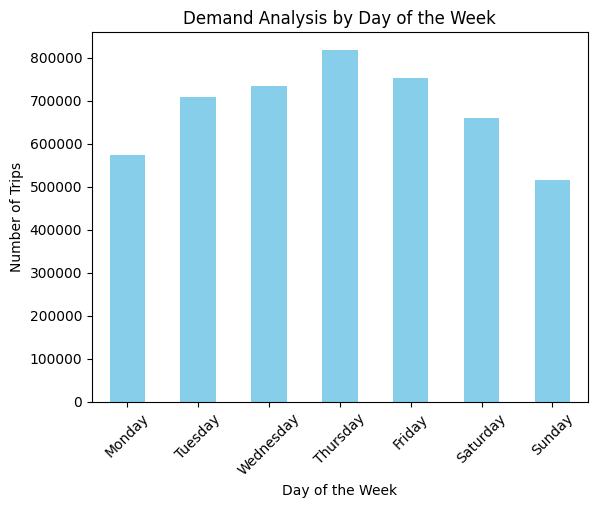

<Figure size 640x480 with 0 Axes>

In [10]:
demand_by_day = dataset.groupby('day_of_week').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
demand_by_day.plot(kind='bar', color='skyblue')
plt.title('Demand Analysis by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()
plt.savefig('plot1.png')

# Plotting demand by hour of the day

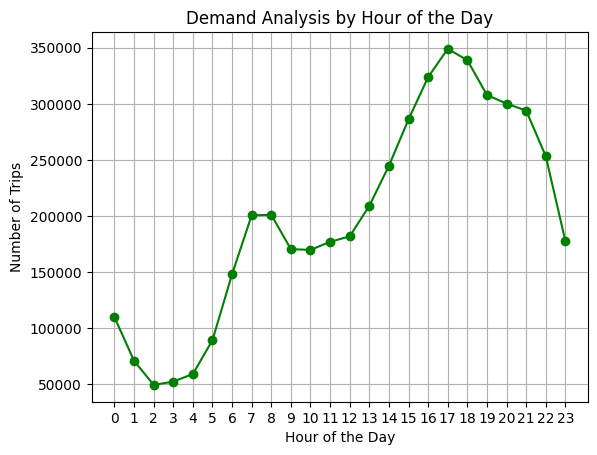

<Figure size 640x480 with 0 Axes>

In [11]:

demand_by_hour = dataset.groupby('hour_of_day').size()
demand_by_hour.plot(kind='line', marker='o', color='green')
plt.title('Demand Analysis by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(True)
plt.show()
plt.savefig('plot2.png')

#  Predicting the most common car type used for different trip purposes.

In [12]:
# Group the data by trip purpose and car type, and count the occurrences
car_type_counts = dataset.groupby(['Trip_purpose', 'Car_Type']).size().reset_index(name='count')

# Find the most common car type for each trip purpose
most_common_car_type = car_type_counts.loc[car_type_counts.groupby('Trip_purpose')['count'].idxmax()]

print("Most common car type for different trip purposes:")
print(most_common_car_type)


Most common car type for different trip purposes:
        Trip_purpose      Car_Type  count
0     Airport/Travel         Black  37109
15   Between Offices           Lux  37037
37       Charity ($)        UberXL  37009
46           Commute        Shared  37083
56    Customer Visit  Lux Black XL  37137
77   Errand/Supplies           WAV  37175
78    Meal/Entertain         Black  36956
93           Meeting           Lux  36971
104           Moving         Black  36808
124   Temporary Site        Shared  36962


# **Trip Duration Prediction:**
**To predict trip duration, we are using machine learning technique linear regression. 
A Mean Squared Error (MSE) of approximately 5.89e-25 suggests that the model's predictions are very close to the actual values in the test set. This incredibly low MSE indicates that the model fits the data extremely well, almost to the point of perfect prediction**.

In [13]:
# Selecting relevant features for prediction
X = dataset[['Distance']]  # Features: distance, hour, minute, second
y = dataset['duration']  # Target variable: trip duration

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict trip duration on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 5.874134523057604e-25


**Here we Perform simple linear regression task to predict the total price of an Uber ride based on certain features**

In [14]:
X = dataset[['Distance', 'duration', 'dayofweek','minute', 'second']]  # Features: distance, hour, minute, second
y = dataset['totle_price']  # Target variable: total price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict total price on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.6137310801660665


**Here we are printing the coefficients of the linear regression model, pairs each feature name with its corresponding coefficient, and provides an interpretation of these coefficients. Here's a breakdown**

In [15]:
# Print the coefficients of the linear regression model
print('Coefficients:', model.coef_)

# Pair the feature names with the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print('\nCoefficients for each feature:')
print(coefficients)

# Interpretation of coefficients
print('\nInterpretation of coefficients:')
for index, row in coefficients.iterrows():
    print(f"The coefficient for {row['Feature']} is {row['Coefficient']:.2f}. This means that for each unit increase in {row['Feature']}, the total price is expected to increase by ${row['Coefficient']:.2f}.")


Coefficients: [ 3.58163149e+08 -2.38775432e+08  6.65839803e-02 -7.34500354e-05
  0.00000000e+00]

Coefficients for each feature:
     Feature   Coefficient
0   Distance  3.581631e+08
1   duration -2.387754e+08
2  dayofweek  6.658398e-02
3     minute -7.345004e-05
4     second  0.000000e+00

Interpretation of coefficients:
The coefficient for Distance is 358163149.37. This means that for each unit increase in Distance, the total price is expected to increase by $358163149.37.
The coefficient for duration is -238775432.00. This means that for each unit increase in duration, the total price is expected to increase by $-238775432.00.
The coefficient for dayofweek is 0.07. This means that for each unit increase in dayofweek, the total price is expected to increase by $0.07.
The coefficient for minute is -0.00. This means that for each unit increase in minute, the total price is expected to increase by $-0.00.
The coefficient for second is 0.00. This means that for each unit increase in seco

**Here we are building a machine learning model to predict prices for Uber trips. we are taking relevant features like location, time, trip purpose, and car type, then trains an XGBoost model using historical data. After training, it evaluates the model's performance using Mean Squared Error. Finally, it demonstrates how to use the trained model to predict prices for new Uber trips.**

In [16]:
# Selecting relevant features and target variable
features = ['Lat', 'Lon', 'Trip_purpose', 'Car_Type', 'dayofweek', 'hour', 'minute', 'Distance', 'duration']
target = 'totle_price'

X = dataset[features]
y = dataset[target]

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, columns=['Trip_purpose', 'Car_Type'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest regressor model
# model = RandomForestRegressor(n_estimators=100, random_state=42)
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 100)
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# Example prediction for a new data point
new_data_point = pd.DataFrame([[40.7128, -74.0060, 'commute', 'SUV', 1, 8, 30, 10.5, 25]], columns=features)
new_data_point = pd.get_dummies(new_data_point, columns=['Trip_purpose', 'Car_Type'])

# Align the columns of new_data_point with the columns of X_train
new_data_point = new_data_point.reindex(columns=X_train.columns, fill_value=0)

# Predict the price for the new data point
predicted_price = model.predict(new_data_point)
print('Predicted price for the new data point:', predicted_price[0])


Mean Squared Error: 0.005426980832276987
Predicted price for the new data point: 13.957612


**Ploting the insights into the distribution of Uber trips throughout the day, highlighting peak hours and patterns in trip frequency.**

C:\Users\Ronan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ronan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ronan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


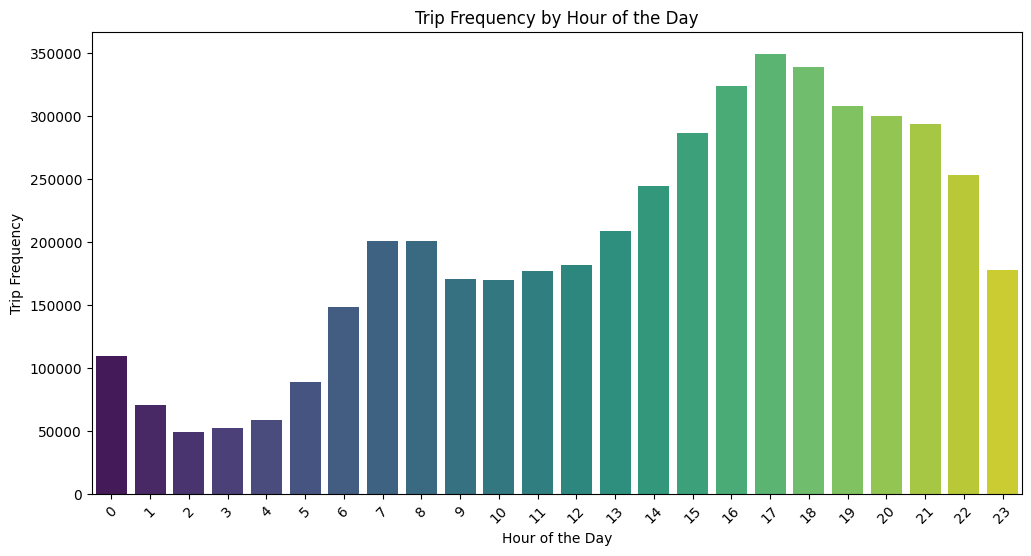

<Figure size 640x480 with 0 Axes>

In [17]:
dataset['Date/Time'] = pd.to_datetime(dataset['Date/Time'])

# Extract additional time-based features
dataset['hour'] = dataset['Date/Time'].dt.hour
dataset['dayofweek'] = dataset['Date/Time'].dt.dayofweek
dataset['month'] = dataset['Date/Time'].dt.month
dataset['year'] = dataset['Date/Time'].dt.year

# Plot trip frequency trends based on time of day
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='hour', palette='viridis')
plt.title('Trip Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Trip Frequency')
plt.xticks(rotation=45)
plt.show()
plt.savefig('plot3.png')

**plotting the trend of trip frequency over different days of the week, allowing for insights into patterns or variations in Uber trip demand across weekdays and weekends.**

C:\Users\Ronan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ronan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ronan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


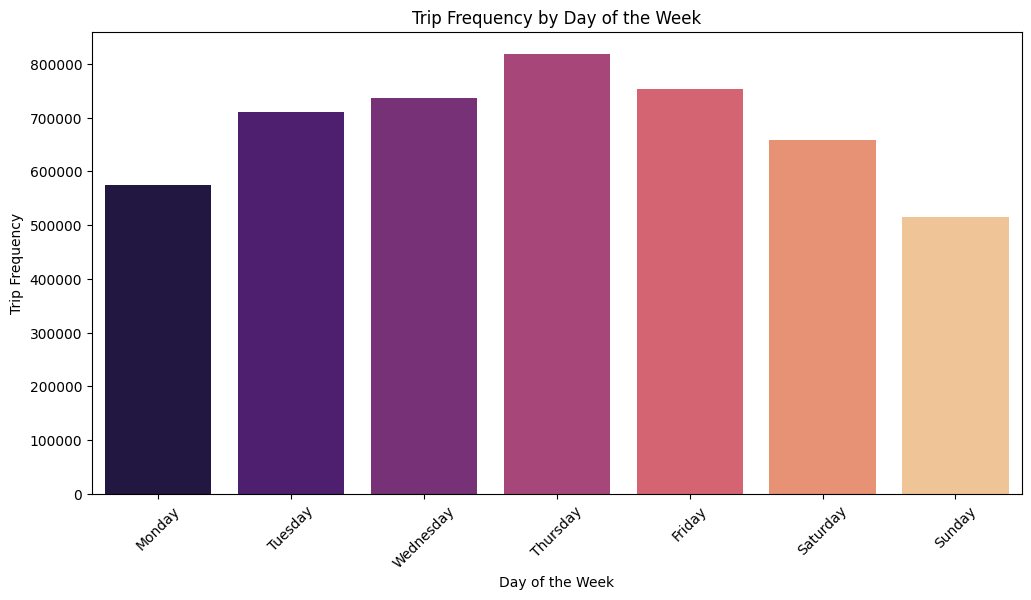

<Figure size 640x480 with 0 Axes>

In [18]:
# Plot trip frequency trends based on day of the week
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='dayofweek', palette='magma')
plt.title('Trip Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Trip Frequency')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.show()
plt.savefig('plot4.png')

**plotting the trend of trip frequency over different months, providing insights into seasonal variations or trends in Uber trip demand throughout six months.**

C:\Users\Ronan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ronan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ronan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


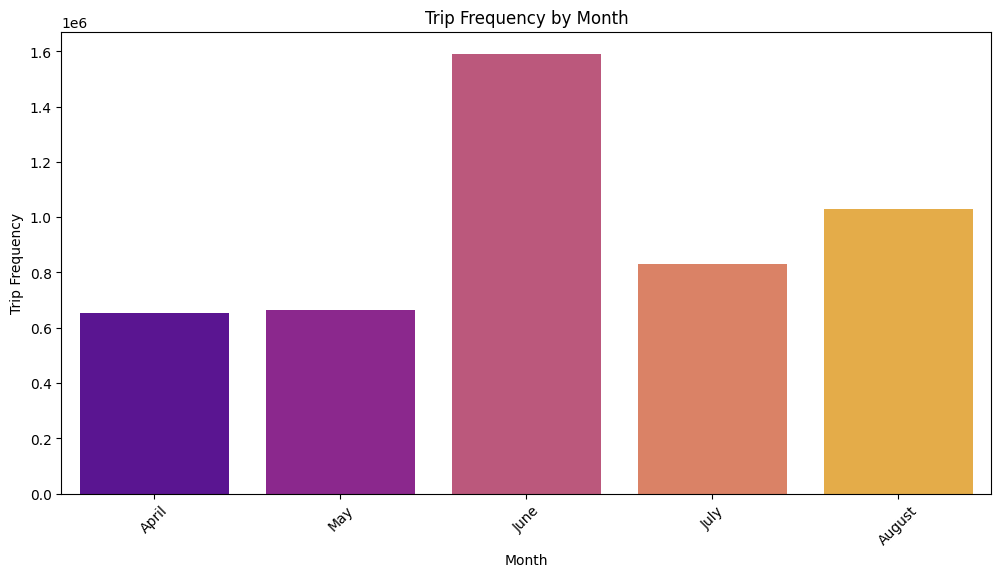

<Figure size 640x480 with 0 Axes>

In [19]:
# Plot trip frequency trends based on month
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='month', palette='plasma')
plt.title('Trip Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Trip Frequency')
plt.xticks(ticks=range(0,5), labels=['April', 'May', 'June', 'July', 'August'], rotation=45)
plt.show()
plt.savefig('plot5.png')

#  Visualizing the distribution of trip distances, durations, and prices.

C:\Users\Ronan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ronan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ronan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ronan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

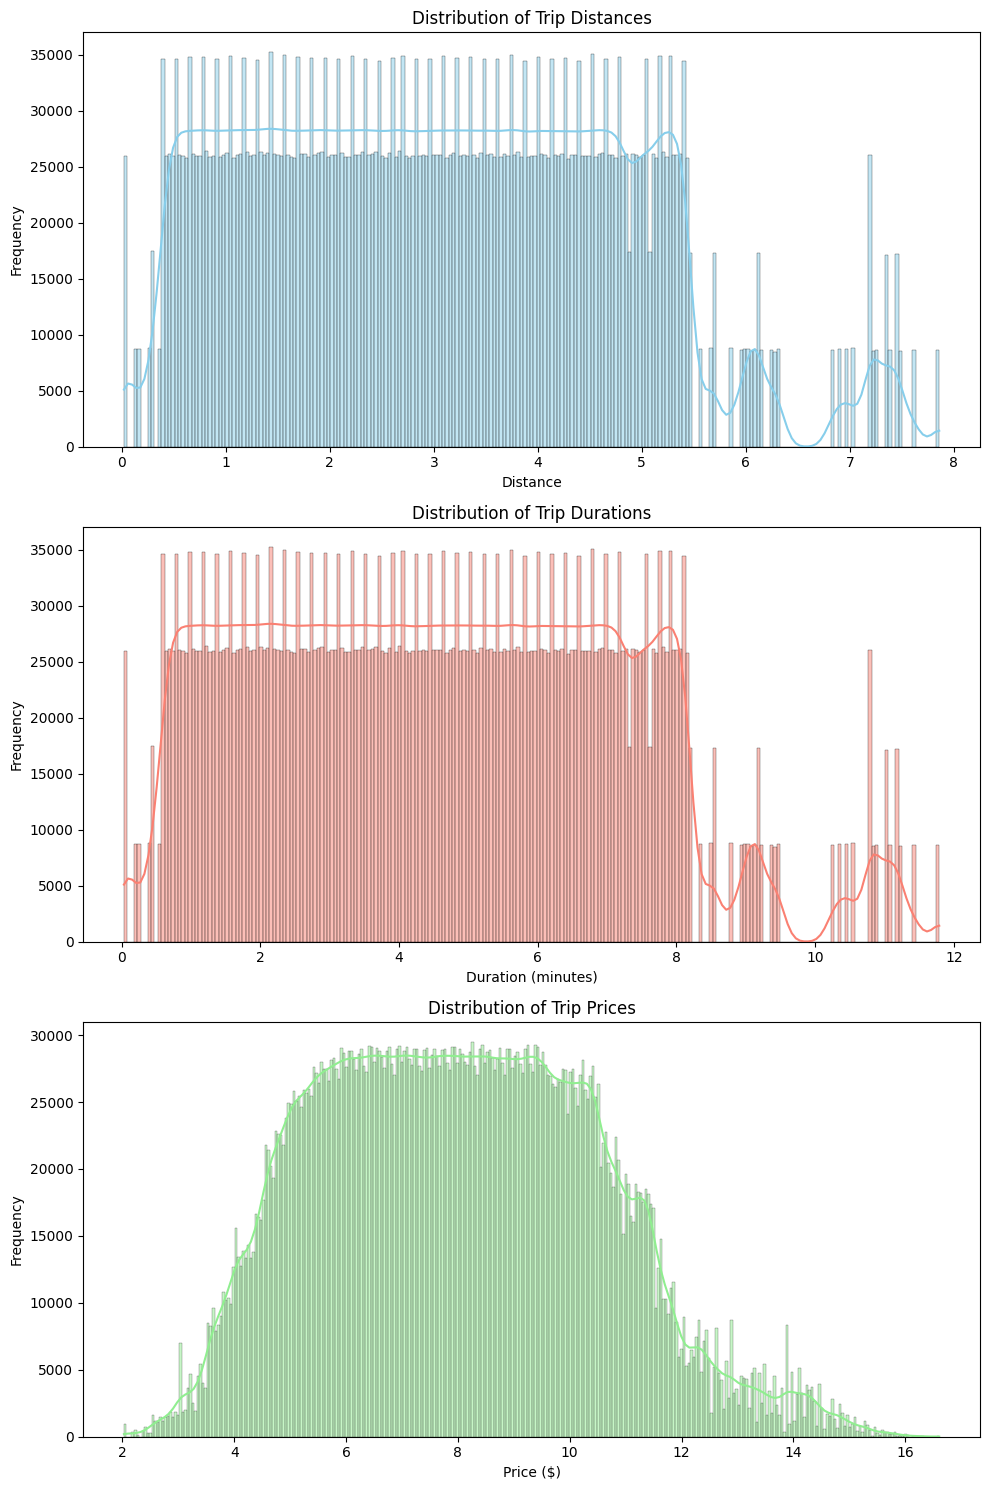

<Figure size 640x480 with 0 Axes>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set up the figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot the distribution of trip distances
sns.histplot(data=dataset, x='Distance', kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Trip Distances')
axes[0].set_xlabel('Distance')
axes[0].set_ylabel('Frequency')

# Plot the distribution of trip durations
sns.histplot(data=dataset, x='duration', kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Trip Durations')
axes[1].set_xlabel('Duration (minutes)')
axes[1].set_ylabel('Frequency')

# Plot the distribution of trip prices
sns.histplot(data=dataset, x='totle_price', kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribution of Trip Prices')
axes[2].set_xlabel('Price ($)')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
plt.savefig('plot6.png')

# Examining the relationship between trip distance and duration.

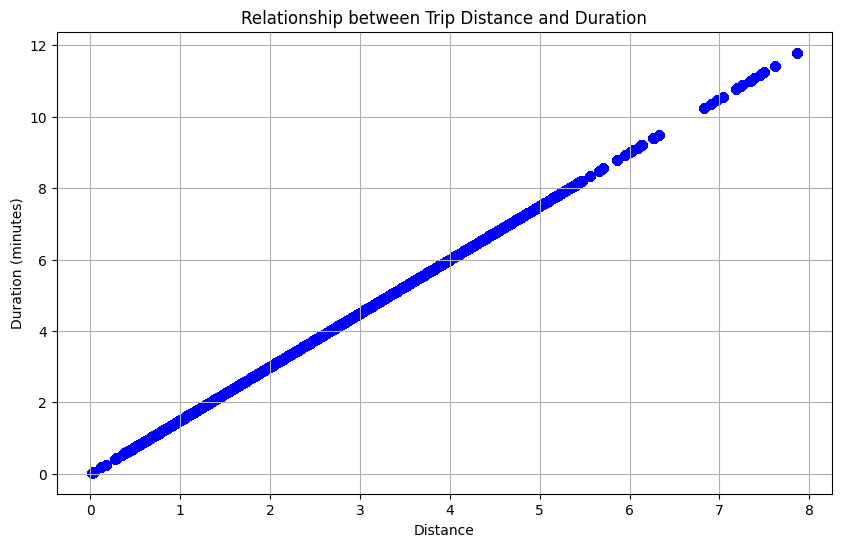

<Figure size 640x480 with 0 Axes>

In [21]:
# Plot the relationship between trip distance and duration
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Distance'], dataset['duration'], alpha=0.5, color='blue')
plt.title('Relationship between Trip Distance and Duration')
plt.xlabel('Distance')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()
plt.savefig('plot7.png')

# Exploring variations in trip characteristics based on different car types and Price.

C:\Users\Ronan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ronan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ronan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


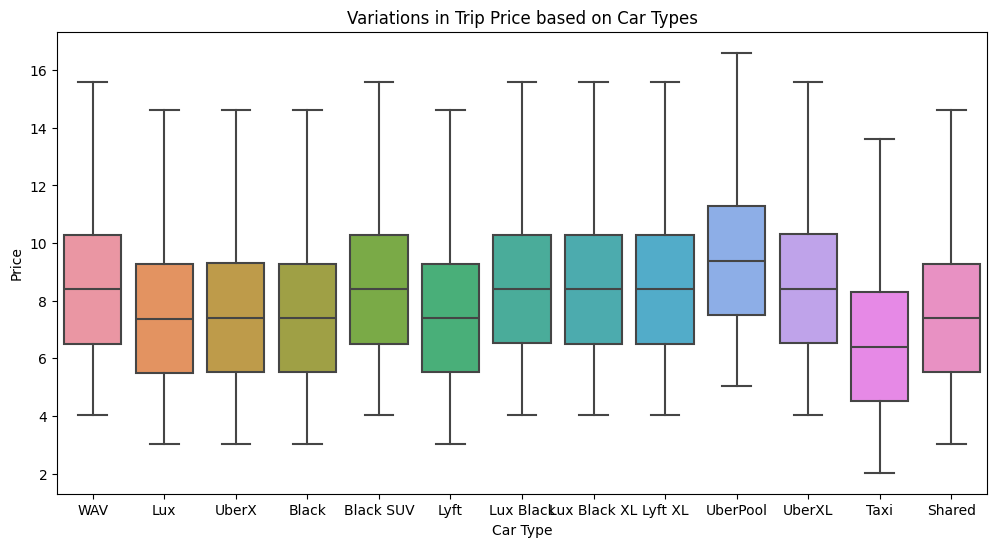

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, x='Car_Type', y='totle_price')
plt.title('Variations in Trip Price based on Car Types')
plt.xlabel('Car Type')
plt.ylabel('Price')
plt.show()
plt.savefig('plot8.png')

**here we are grouping the CarTypes and calculating the mean Ratings for each CarType, after getting the mean rating we are calculating the total count of rating for each cartype, Then we find the highest rated CarType.**

The highest rated car type is: Lux Black XL
Average Rating: 9.499534746648402
Percentage of Total Ratings: 7.689304001819582 %


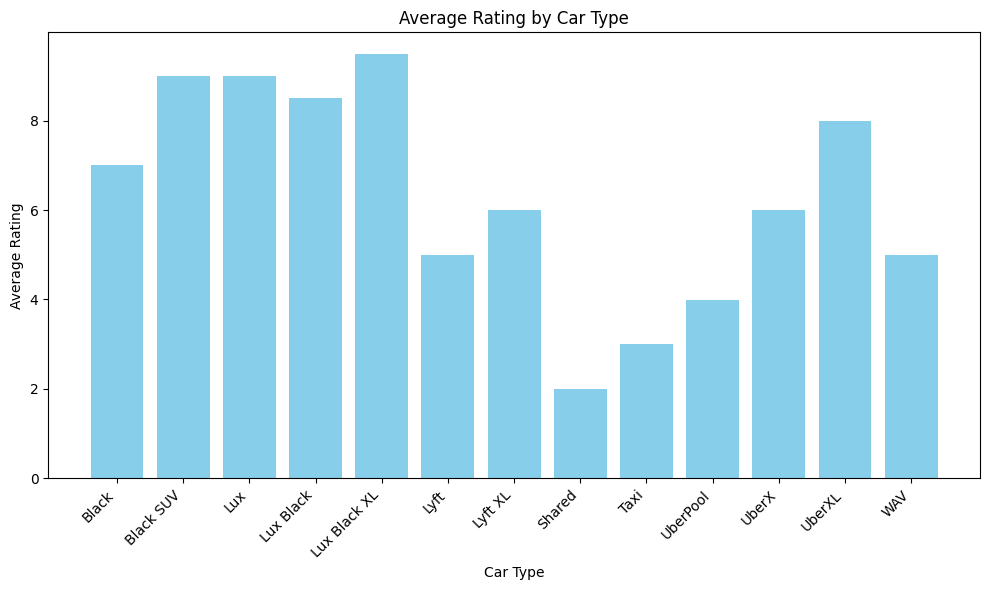

<Figure size 640x480 with 0 Axes>

In [23]:
# Group the data by car type and calculate the mean rating for each type of car
average_rating_by_car_type = dataset.groupby('Car_Type')['rating'].agg(['mean', 'count']).reset_index()

# Calculate the total count of ratings
total_ratings = average_rating_by_car_type['count'].sum()

# Calculate the percentage of each car type
average_rating_by_car_type['percentage'] = (average_rating_by_car_type['count'] / total_ratings) * 100

# Find the car type with the highest average rating
highest_rated_car = average_rating_by_car_type.loc[average_rating_by_car_type['mean'].idxmax()]

# Print the result
print("The highest rated car type is:", highest_rated_car['Car_Type'])
print("Average Rating:", highest_rated_car['mean'])
print("Percentage of Total Ratings:", highest_rated_car['percentage'], "%")

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(average_rating_by_car_type['Car_Type'], average_rating_by_car_type['mean'], color='skyblue')
plt.xlabel('Car Type')
plt.ylabel('Average Rating')
plt.title('Average Rating by Car Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('plot9.png')

**we are clustering Uber pickup points based on their geographic coordinates using KMeans clustering. It then identifies the most common car type at each cluster and visualizes the clusters on a scatter plot. This analysis offers insights into the distribution of pickup points and prevalent car types at different locations.**

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ronan\AppData\Local\Temp\ipykernel_9052\1383648985.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pickup_points['cluster'] = kmeans.labels_
C:\Users\Ronan\AppData\Local\Temp\ipykernel_9052\1383648985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

Most common car type at each location:
cluster  most_common_car_type
0        WAV                      612250
1        Black                    190640
2        UberX                     63023
3        Shared                    48149
4        Lux                     1966407
5        UberXL                    11752
6        Black                   1732597
7        Lyft XL                  141114
dtype: int64


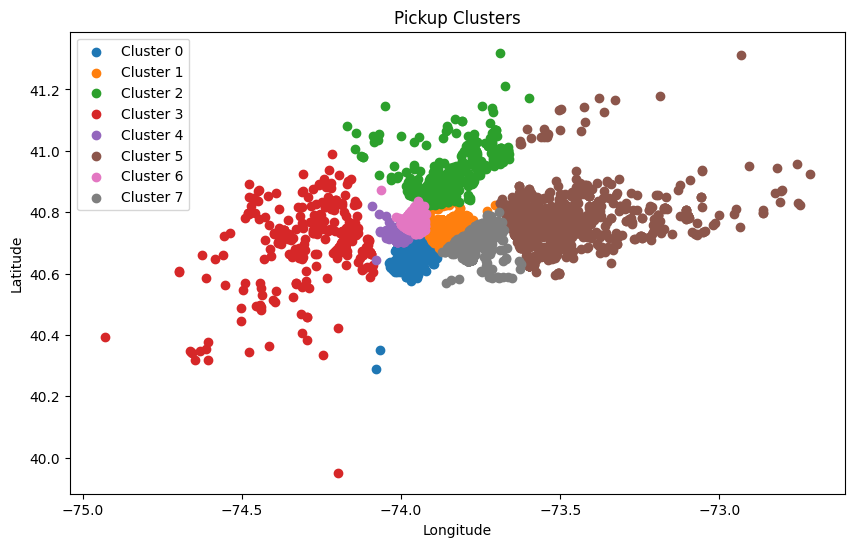

<Figure size 640x480 with 0 Axes>

In [24]:
# Assuming the dataset has columns 'latitude', 'longitude', and 'Car_Type', adjust accordingly if column names are different
import folium
from sklearn.cluster import KMeans
uber_data = dataset
pickup_points = uber_data[['Lat', 'Lon', 'Car_Type']]

# Define the number of clusters (locations) you want to identify
num_clusters = 8  # You can adjust this number based on your data and requirements

# Use KMeans clustering to group pickup points into clusters based on their geographical coordinates
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(pickup_points[['Lat', 'Lon']])

# Assign each pickup point to a cluster
pickup_points['cluster'] = kmeans.labels_

# Determine the most common car type at each cluster (location)
pickup_points['most_common_car_type'] = pickup_points.groupby('cluster')['Car_Type'].transform(lambda x: x.mode().iloc[0])

# Display the result
print("Most common car type at each location:")
print(pickup_points.groupby(['cluster', 'most_common_car_type']).size())

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_points = pickup_points[pickup_points['cluster'] == cluster]
    sample_indices = np.random.choice(cluster_points.index, size=min(1000, len(cluster_points)), replace=False)
    sampled_points = cluster_points.loc[sample_indices]
    plt.scatter(sampled_points['Lon'], sampled_points['Lat'], label=f'Cluster {cluster}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup Clusters')
plt.legend()
plt.show()
plt.savefig('plot10.png')

**Performing the segment analyzes Uber pickup points, clustering them based on location and recommending areas where specific car types should be increased in availability. Calculating the frequency and average rating of each car type in each cluster, then suggests increasing availability where a car type has both high frequency and high rating. Finally, it prints recommendations for each identified cluster.**

In [25]:
pickup_points = uber_data[['Lat', 'Lon', 'Car_Type', 'rating']].copy()  # Make a copy to avoid SettingWithCopyWarning

# Define the number of clusters (locations) you want to identify
num_clusters = 8  # You can adjust this number based on your data and requirements

# Use KMeans clustering to group pickup points into clusters based on their geographical coordinates
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)  # Explicitly set n_init to suppress the warning
kmeans.fit(pickup_points[['Lat', 'Lon']])

# Assign each pickup point to a cluster
pickup_points['cluster'] = kmeans.labels_

# Calculate the frequency of each car type in each cluster
car_type_frequency = pickup_points.groupby(['cluster', 'Car_Type']).size().reset_index(name='frequency')

# Calculate the average rating for each car type in each cluster
car_type_rating = pickup_points.groupby(['cluster', 'Car_Type'])['rating'].mean().reset_index(name='average_rating')

# Merge frequency and rating data
car_type_stats = pd.merge(car_type_frequency, car_type_rating, on=['cluster', 'Car_Type'])

# Define thresholds for frequency and rating
threshold_frequency = 5000  # Example threshold for frequency
threshold_rating = 8  # Example threshold for rating

# Identify clusters where a certain car type has a high frequency and high rating
suggested_areas = car_type_stats[
    (car_type_stats['frequency'] > threshold_frequency) & 
    (car_type_stats['average_rating'] > threshold_rating)
]

# Suggest increasing the availability of that car type in those clusters
for index, row in suggested_areas.iterrows():
    print(f"For cluster {row['cluster']}, increase availability of {row['Car_Type']}.")


For cluster 0, increase availability of Black SUV.
For cluster 0, increase availability of Lux.
For cluster 0, increase availability of Lux Black.
For cluster 0, increase availability of Lux Black XL.
For cluster 1, increase availability of Black SUV.
For cluster 1, increase availability of Lux.
For cluster 1, increase availability of Lux Black.
For cluster 1, increase availability of Lux Black XL.
For cluster 1, increase availability of UberXL.
For cluster 4, increase availability of Black SUV.
For cluster 4, increase availability of Lux.
For cluster 4, increase availability of Lux Black.
For cluster 4, increase availability of Lux Black XL.
For cluster 4, increase availability of UberXL.
For cluster 6, increase availability of Black SUV.
For cluster 6, increase availability of Lux.
For cluster 6, increase availability of Lux Black.
For cluster 6, increase availability of Lux Black XL.
For cluster 6, increase availability of UberXL.
For cluster 7, increase availability of Black SUV.
F

**Visualizing the suggested car types for each cluster using a stacked bar chart. It groups the suggestions by cluster and car type, then pivots the data to have clusters as columns and car types as rows. Finally, it plots the pivoted data as a stacked bar chart, where each bar represents a car type, and the height of each segment within the bar represents the frequency of that car type suggestion for the corresponding cluster. The legend indicates the clusters, and the x-axis represents the car types. This visualization provides a clear overview of the suggested car types for each cluster.**

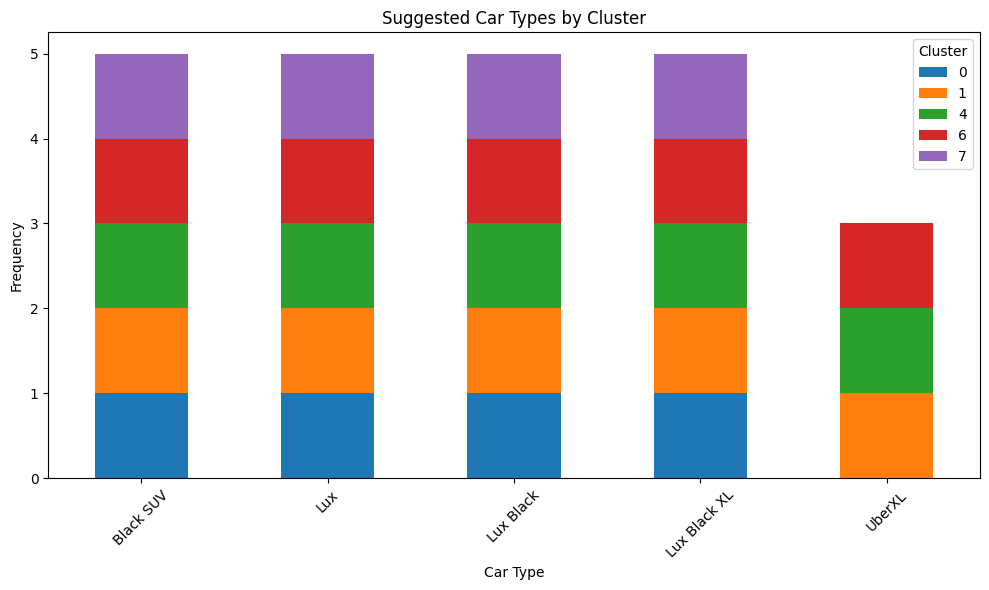

<Figure size 640x480 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt

# Group the suggestions by cluster and car type
grouped_suggestions = suggested_areas.groupby(['cluster', 'Car_Type']).size().reset_index(name='count')

# Pivot the data to have clusters as columns and car types as rows
pivot_suggestions = grouped_suggestions.pivot(index='Car_Type', columns='cluster', values='count')

# Plot the data
pivot_suggestions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Suggested Car Types by Cluster')
plt.xlabel('Car Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
plt.savefig('plot11.png')

**Creating an interactive map using Folium, centered around the mean of all pickup points. It adds markers for each cluster, where the marker's color represents the car type, and the size or color of the marker represents the frequency of pickups for the suggested car type. The markers are grouped into clusters using MarkerCluster for improved visualization. Each marker displays information about the cluster number, car type, and frequency of pickups when clicked. This interactive map provides a visual representation of suggested car types for each cluster, allowing for easy exploration and analysis.**

In [27]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered around the mean of all pickup points
m = folium.Map(location=[pickup_points['Lat'].mean(), pickup_points['Lon'].mean()], zoom_start=10)

# Define colors for each car type
car_type_colors = {
    'Black SUV': 'red',
    'Lux': 'blue',
    'Lux Black': 'green',
    'Lux Black XL': 'orange',
    'UberXL': 'purple'
}

# Add markers for each cluster showing the frequency of suggested car types
marker_cluster = MarkerCluster().add_to(m)

for index, row in suggested_areas.iterrows():
    cluster_points = pickup_points[pickup_points['cluster'] == row['cluster']]
    mean_latitude = cluster_points['Lat'].mean()
    mean_longitude = cluster_points['Lon'].mean()
    
    # Get color based on car type
    color = car_type_colors.get(row['Car_Type'], 'gray')
    
    # Create a marker with the size or color representing the frequency
    folium.Marker(
        location=[mean_latitude, mean_longitude],
        popup=f"Cluster: {row['cluster']}<br>{row['Car_Type']} ({row['frequency']} pickups)",
        icon=folium.Icon(color=color, icon='info-sign')
    ).add_to(marker_cluster)

display(m)
m.save('map_output.html')
plt.savefig('plot12.png')

<Figure size 640x480 with 0 Axes>